In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/heart.csv')
print("Original DataFrame head:")
print(df.head())
print("\nOriginal DataFrame shape:", df.shape)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nDataFrame head after one-hot encoding:")
print(df_encoded.head())
print("\nDataFrame shape after one-hot encoding:", df_encoded.shape)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Original DataFrame head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Original DataFrame shape: (1025, 14)

DataFrame head after one-hot encoding:
   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_1   cp_2   cp_3  \
0   52       125   212      168      1.0       0   True  False  False  False   
1   53       140   203      155      3.1       0   True  False  False  False   
2   70       145   174      125      2

Decision Tree Classifier trained successfully.


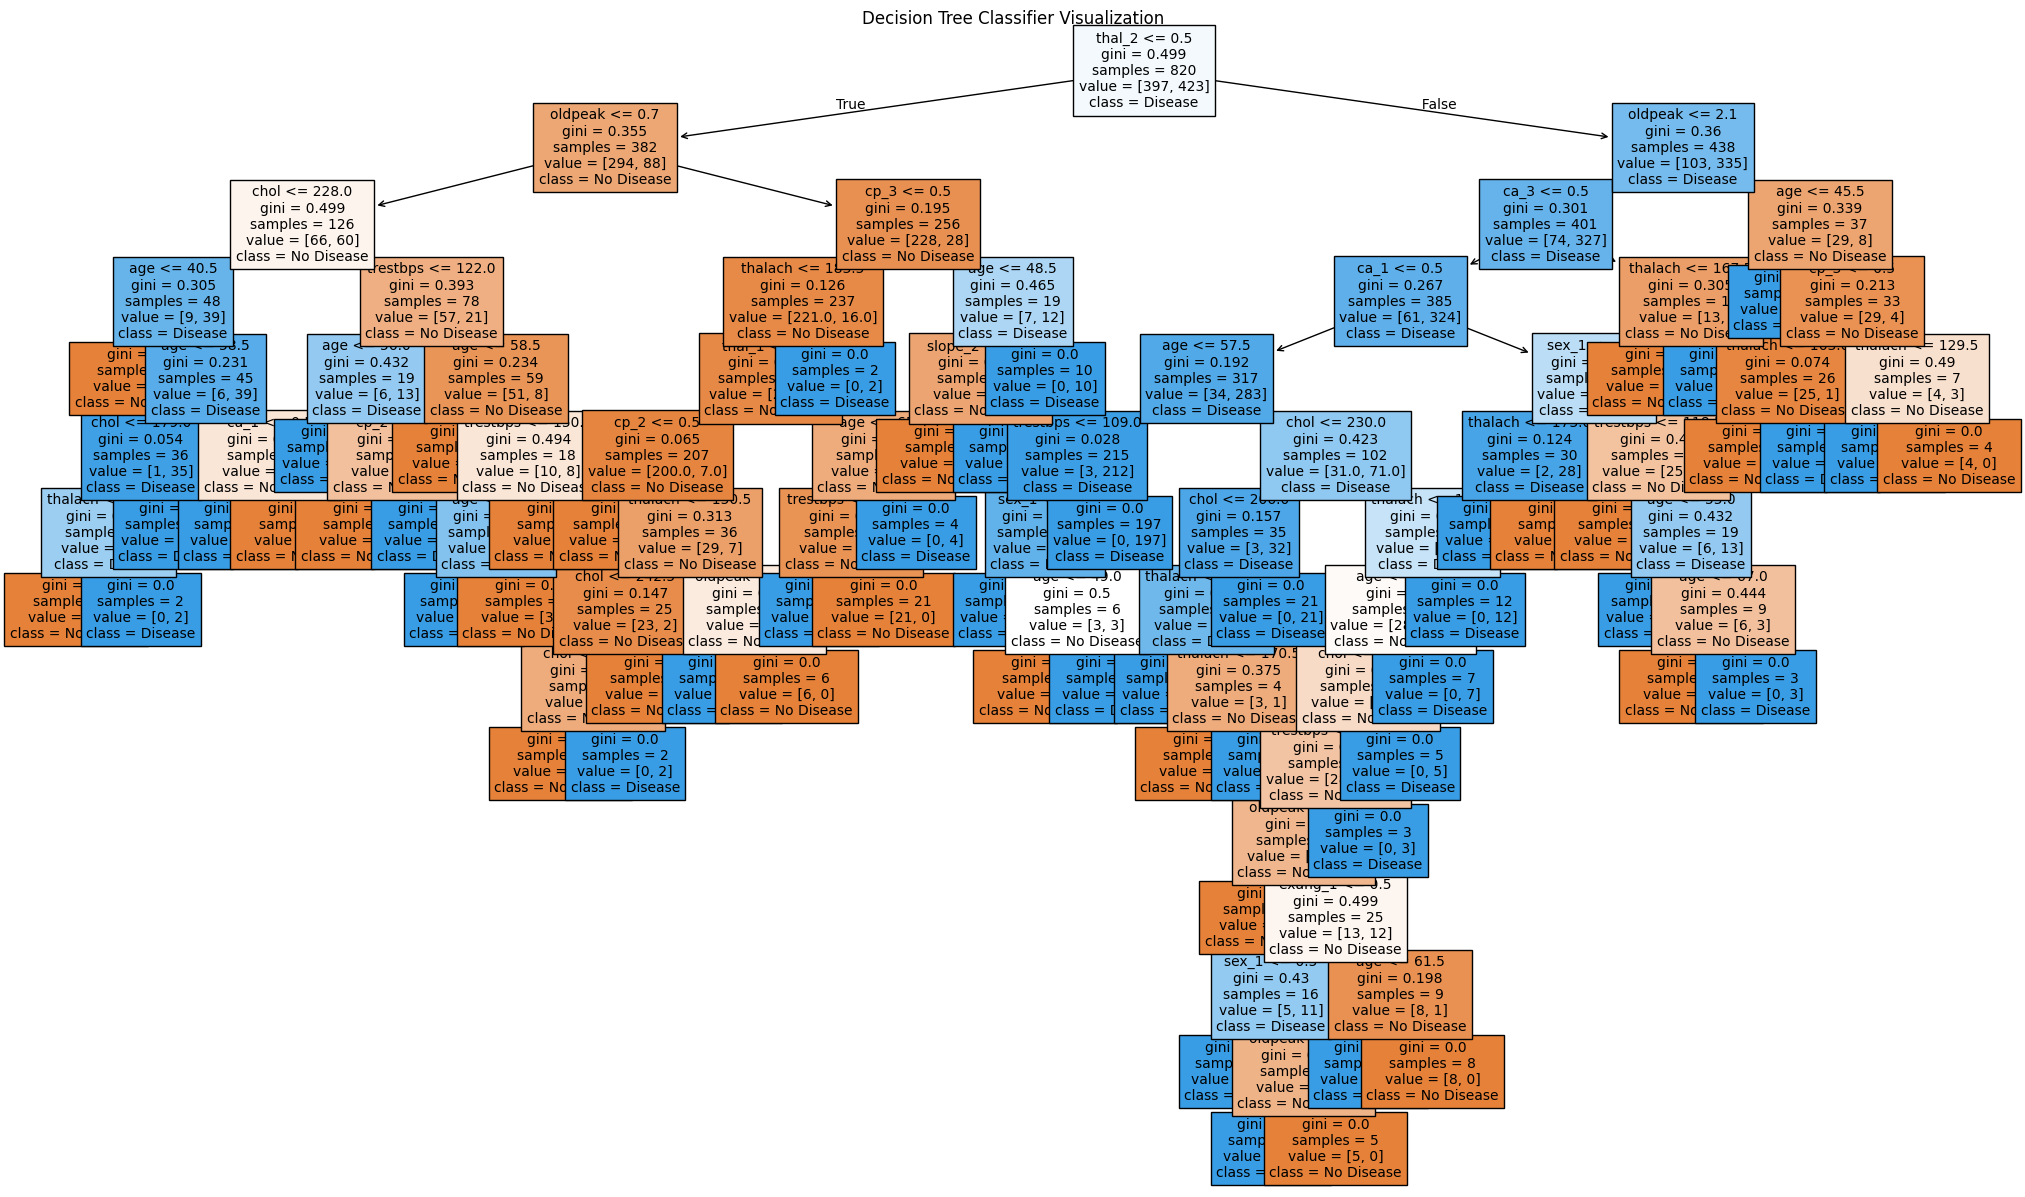

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")
plt.figure(figsize=(25, 15))
plot_tree(dt_classifier,
          filled=True,
          feature_names=X.columns.tolist(),
          class_names=['No Disease', 'Disease'],
          fontsize=10)
plt.title('Decision Tree Classifier Visualization')
plt.show()

Initial Decision Tree Training Accuracy: 1.0000
Initial Decision Tree Test Accuracy: 1.0000


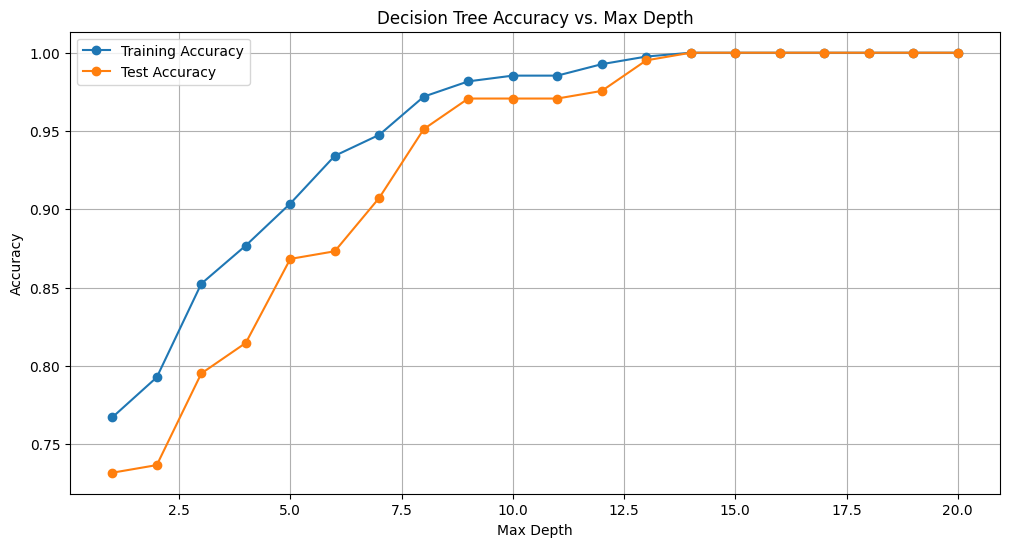

In [8]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
train_accuracy_initial = dt_classifier.score(X_train, y_train)
test_accuracy_initial = dt_classifier.score(X_test, y_test)
print(f"Initial Decision Tree Training Accuracy: {train_accuracy_initial:.4f}")
print(f"Initial Decision Tree Test Accuracy: {test_accuracy_initial:.4f}")
train_accuracies = []
test_accuracies = []
depths = range(1, 21)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(dt.score(X_train, y_train))
    test_accuracies.append(dt.score(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()


Initial Decision Tree Training Accuracy: 1.0000
Initial Decision Tree Test Accuracy: 1.0000


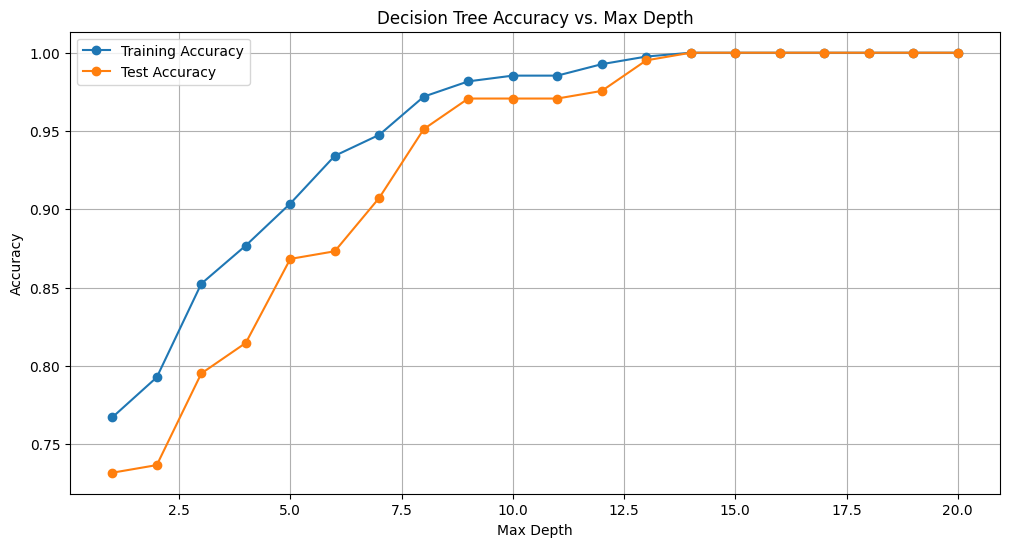

In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_accuracy_initial = dt_classifier.score(X_train, y_train)
test_accuracy_initial = dt_classifier.score(X_test, y_test)

print(f"Initial Decision Tree Training Accuracy: {train_accuracy_initial:.4f}")
print(f"Initial Decision Tree Test Accuracy: {test_accuracy_initial:.4f}")

train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:

    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)

    dt.fit(X_train, y_train)


    train_accuracies.append(dt.score(X_train, y_train))

    test_accuracies.append(dt.score(X_test, y_test))


plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')


plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')


plt.legend()


plt.grid(True)
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")


y_pred_rf = rf_classifier.predict(X_test)

rf_test_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nRandom Forest Test Accuracy: {rf_test_accuracy:.4f}")

best_dt_test_accuracy = max(test_accuracies)

print(f"Best Decision Tree Test Accuracy (from previous analysis): {best_dt_test_accuracy:.4f}")

if rf_test_accuracy > best_dt_test_accuracy:
    print("Conclusion: Random Forest performs better than the best Decision Tree model on the test set.")
elif rf_test_accuracy < best_dt_test_accuracy:
    print("Conclusion: The best Decision Tree model performs better than Random Forest on the test set.")
else:
    print("Conclusion: Random Forest and the best Decision Tree model perform equally well on the test set.")

Random Forest Classifier trained successfully.

Random Forest Test Accuracy: 1.0000
Best Decision Tree Test Accuracy (from previous analysis): 1.0000
Conclusion: Random Forest and the best Decision Tree model perform equally well on the test set.


Top 10 Feature Importances from Random Forest:
     Feature  Importance
4    oldpeak    0.120946
3    thalach    0.116000
21    thal_3    0.095136
20    thal_2    0.091893
2       chol    0.088077
0        age    0.083778
1   trestbps    0.071788
12   exang_1    0.045965
14   slope_2    0.040217
15      ca_1    0.033916


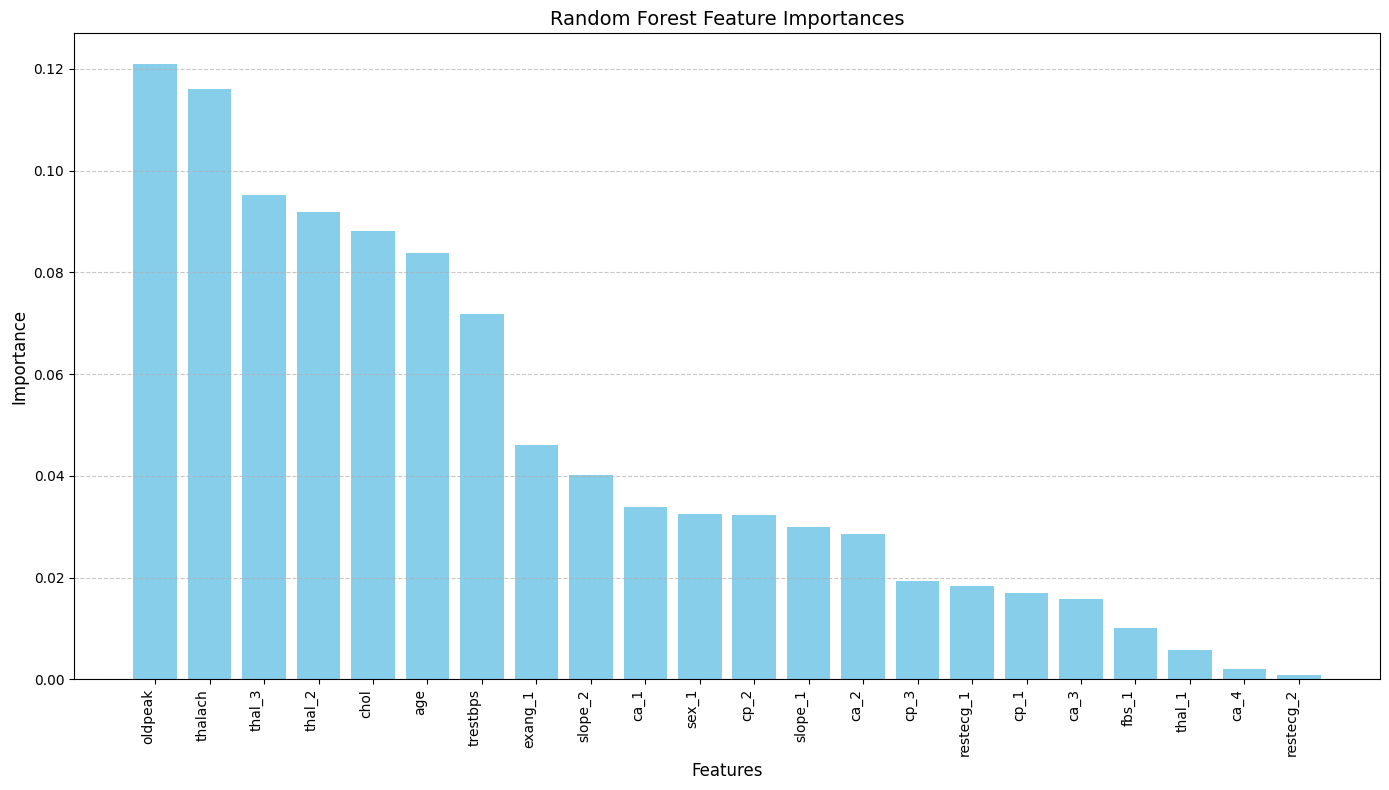

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances from Random Forest:")
print(features_df.head(10))

plt.figure(figsize=(14, 8))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')

plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)

plt.title('Random Forest Feature Importances', fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv = 10

dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=cv, scoring='accuracy')

print(f"Decision Tree Cross-Validation Accuracy: {np.mean(dt_cv_scores):.4f} (+/- {np.std(dt_cv_scores):.4f})")

rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=cv, scoring='accuracy')

print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.4f} (+/- {np.std(rf_cv_scores):.4f})")

Decision Tree Cross-Validation Accuracy: 0.9912 (+/- 0.0134)
Random Forest Cross-Validation Accuracy: 0.9971 (+/- 0.0088)
